In [11]:
import numpy as np
import netCDF4 as nc
import pyfesom2 as pf
import xarray as xr
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation,TriAnalyzer
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cmocean

from pyproj import Proj, transform


In [2]:
meshpath = '/home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed/'
mesh = pf.load_mesh(meshpath)
elem2=mesh.elem[mesh.no_cyclic_elem,:]

/home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed/pickle_mesh_py3_fesom2


In [3]:
########## processing data ###############

In [4]:
%%bash 
### define datapath 
datafile=/home/a/a270075/ba0989/awiesm2.5/experiments-3/21k/outdata/fesom/
cdo  cat  $datafile/a_ice.fesom.209?01.01.nc   tmp.nc
cdo  -ymonmean tmp.nc  seaice.nc 
rm tmp.nc 

cdo    cat: Processed 11428680 values from 10 variables over 120 timesteps [0.24s 49MB].
cdo    ymonmean: Processed 11428680 values from 1 variable over 120 timesteps [0.05s 54MB].


In [5]:
### read data #############
ds = xr.open_dataset('seaice.nc')
data = ds['a_ice'].values

In [14]:
#____ plot sea ice _________
proj = ccrs.PlateCarree()
crs_target = ccrs.NorthPolarStereo(central_longitude= -45,true_scale_latitude=70.,globe=None)
crs_target2 = ccrs.SouthPolarStereo(central_longitude= -45,true_scale_latitude=-70.,globe=None)
print(crs_target.proj4_params)
print(crs_target2.proj4_params)

breaks = np.linspace(1e-8,1,41)
months=[3,9]

lonticks = np.arange(-180.,180.1,60.)
latticks = np.arange(-90.,90.1,30.)
lon_formatter = cticker.LongitudeFormatter()   
lat_formatter = cticker.LatitudeFormatter()

{'ellps': 'WGS84', 'proj': 'stere', 'lat_0': 90, 'lon_0': -45, 'x_0': 0.0, 'y_0': 0.0, 'lat_ts': 70.0}
{'ellps': 'WGS84', 'proj': 'stere', 'lat_0': -90, 'lon_0': -45, 'x_0': 0.0, 'y_0': 0.0, 'lat_ts': -70.0}


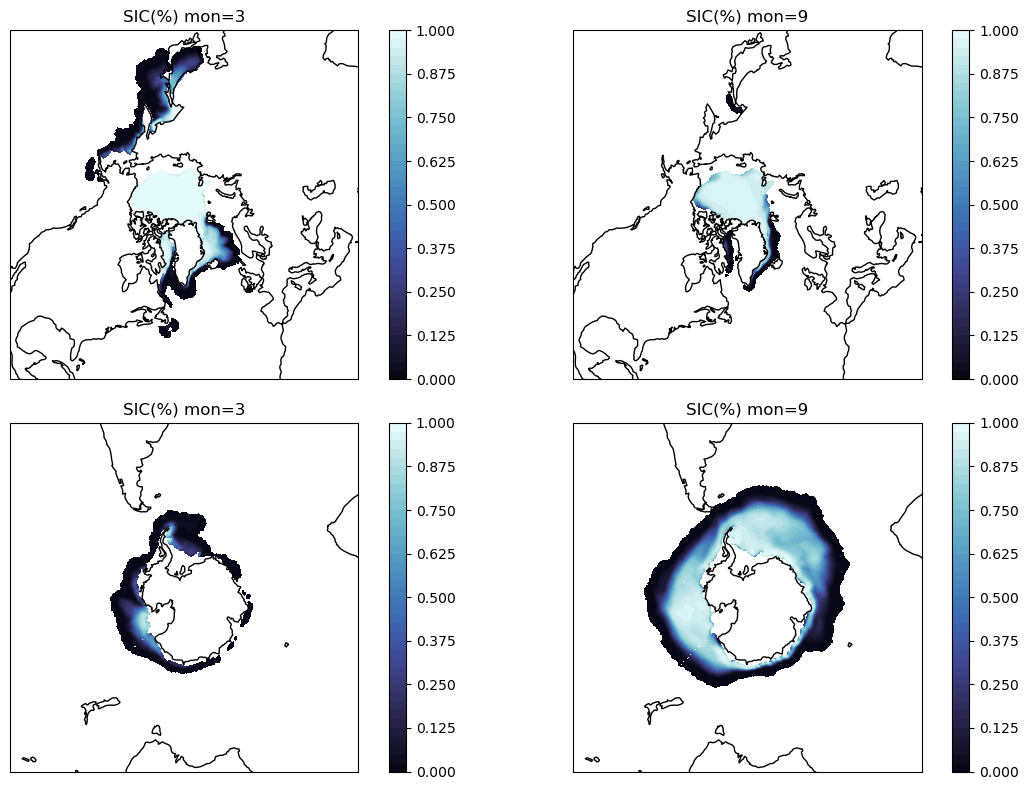

In [7]:
############### polar projection  ###############

fig = plt.figure(figsize=(12,8))


for i in range(0, len(months)):
    ax = fig.add_subplot(2, len(months), i+1,projection=crs_target)
    cs = plt.tricontourf(mesh.x2, mesh.y2, elem2, data[months[i]-1,:],extend='neither',cmap=cmocean.cm.ice, levels=breaks, transform=proj)
    ax.set_extent([-180,180, 30,90], crs=proj)
    ax.coastlines()
    ax.set_title('SIC(%) mon='+str(months[i]))
    plt.colorbar(cs)

    ax2 = fig.add_subplot(2, len(months), i+len(months)+1,projection=crs_target2)
    cs2 = plt.tricontourf(mesh.x2, mesh.y2, elem2, data[months[i]-1,:],extend='neither',cmap=cmocean.cm.ice, levels=breaks, transform=proj)
    ax2.set_extent([-180,180, -30,-90], crs=proj)
    ax2.coastlines()
    ax2.set_title('SIC(%) mon='+str(months[i]))
    plt.colorbar(cs2)


fig.tight_layout()

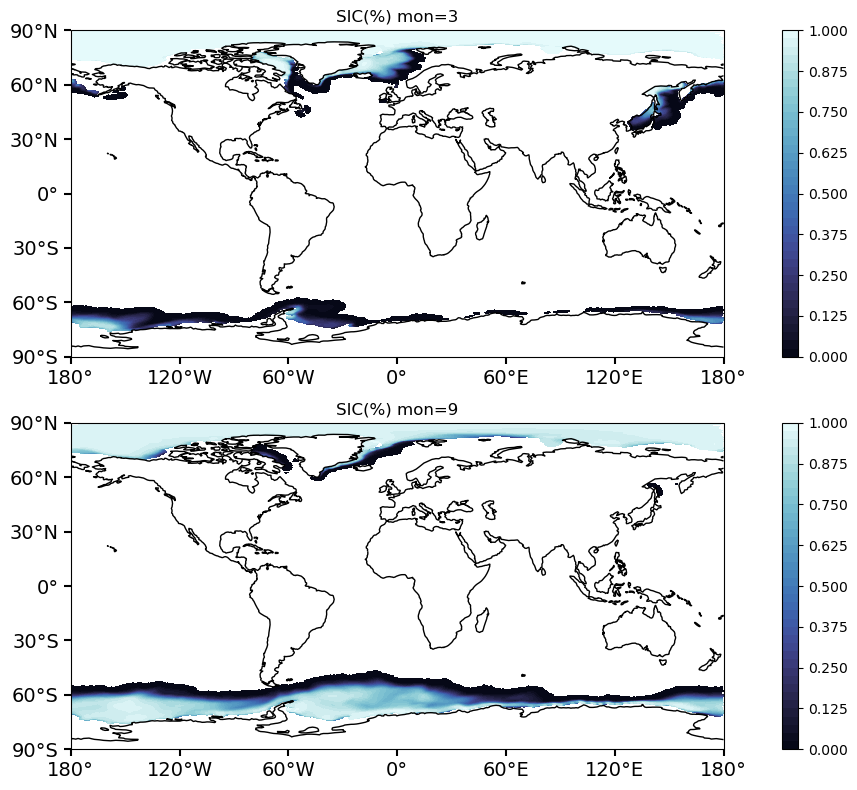

In [13]:
############### normal projection  ###############

fig = plt.figure(figsize=(12,8))


for i in range(0, len(months)):
    ax = fig.add_subplot(2, 1, i+1,projection=proj)
    cs = plt.tricontourf(mesh.x2, mesh.y2, elem2, data[months[i]-1,:],extend='neither',cmap=cmocean.cm.ice, levels=breaks, transform=proj)
    ax.set_extent([-180,180, -90,90], crs=proj)
    ax.coastlines()
    ax.set_title('SIC(%) mon='+str(months[i]))
    plt.colorbar(cs)

    
    ax.set_yticks(latticks, crs=proj)
    ax.set_xticks(lonticks, crs=proj)
    ax.tick_params(axis='x', which='major', direction='out',size=5, width=1.5, labelsize=14)
    ax.tick_params(axis='y', which='major', direction='out',size=5, width=1.5, labelsize=14)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)



fig.tight_layout()